In [1]:
from centigrad.nn import Module, Linear, Tanh
from centigrad.losses import MSELoss
from utils.trace_graph import draw_dot
import numpy as np
import matplotlib.pyplot as plt

## Make up dataset

In [2]:
xs = np.random.randn(4, 3)
ys = np.array([1.0, -1.0, -1.0, 1.0])

## Define model

In [3]:
class BobNet(Module):
    def __init__(self):
        self.l1 = Linear(3, 4, low=-1.0)
        self.a1 = Tanh()
        self.l2 = Linear(4, 4, low=-1.0)
        self.a2 = Tanh()
        self.l3 = Linear(4, 1, low=-1.0)
        self.a3 = Tanh()
    def forward(self, inputs: np.ndarray):
        out = self.l1.forward(inputs)
        out = self.a1.forward(out)
        out = self.l2.forward(out)
        out = self.a2.forward(out)
        out = self.l3.forward(out)
        out = self.a3.forward(out)
        return out
    def parameters(self):
        params = []
        params.extend(self.l1.parameters())
        params.extend(self.l2.parameters())
        params.extend(self.l3.parameters())
        return params
    def zero_grad(self):
        for p in self.parameters():
            p.grad = 0.0
    def update(self):
        for p in model.parameters():
            p.data += -0.1 * p.grad

In [4]:
model = BobNet()
loss_function = MSELoss()
losses = []

## Training

In [5]:
for k in range(100):
    out = np.array([model.forward(x) for x in xs]).reshape(-1)
    loss = loss_function(out, ys)
    losses.append(loss.data)
    model.zero_grad()
    loss.backward()
    model.update()
    if k % 10 == 0: print(f"loss after {k} steps: {loss.data}")

loss after 0 steps: 1.7528143656784012
loss after 10 steps: 0.474641379741217
loss after 20 steps: 0.09748496218905528
loss after 30 steps: 0.0423309529901245
loss after 40 steps: 0.02552849092572141
loss after 50 steps: 0.01787011314107574
loss after 60 steps: 0.013590002796563418
loss after 70 steps: 0.010889771111286797
loss after 80 steps: 0.009044439534323564
loss after 90 steps: 0.007709906411959787


## Results

[Value(data=0.9074472750708745, grad=-0.04627636246456274)
 Value(data=-0.8983397760172349, grad=0.05083011199138254)
 Value(data=-0.9392201274933031, grad=0.03038993625334846)
 Value(data=0.932358915041586, grad=-0.033820542479207016)]


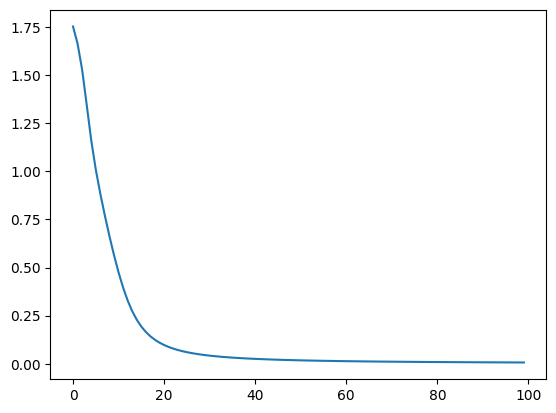

In [6]:
draw_dot(loss)
plt.plot(losses)
print(out)